In [28]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# pip install openpyxl
df_emisiones = pd.read_excel('../Datasets/Emisiones_CO2.xlsx', 'Datos de CO2')
print(df_emisiones.columns)

Index(['Código de país', 'Nombre del país', 'Región', 'Año', 'CO2 (kt)',
       'CO2 per cápita (toneladas métricas)'],
      dtype='object')


In [30]:
df_emisiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Código de país                       11127 non-null  object 
 1   Nombre del país                      11127 non-null  object 
 2   Región                               11127 non-null  object 
 3   Año                                  11127 non-null  int64  
 4   CO2 (kt)                             9032 non-null   float64
 5   CO2 per cápita (toneladas métricas)  9029 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 521.7+ KB


In [31]:
df_emisiones.dropna(subset=['CO2 (kt)'], inplace=True)

In [32]:
df_emisiones.drop(columns=['CO2 per cápita (toneladas métricas)'], inplace=True)

In [33]:
df_emisiones.rename(columns={'CO2 (kt)': 'CO2kt'}, inplace=True)

In [34]:
df_emisiones.rename(columns={'Código de país': 'Código_Pais', 'Nombre del país': 'Nombre_País'}, inplace=True)

In [35]:
df_emisiones.Nombre_País.value_counts()

Kuwait                    52
Trinidad y Tobago         52
San Cristóbal y Nieves    52
Corea (República)         52
Tonga                     52
                          ..
Timor Oriental            10
Lesoto                     7
Montenegro                 7
Serbia                     6
Liechtenstein              5
Name: Nombre_País, Length: 199, dtype: int64

<AxesSubplot:xlabel='Año', ylabel='CO2kt'>

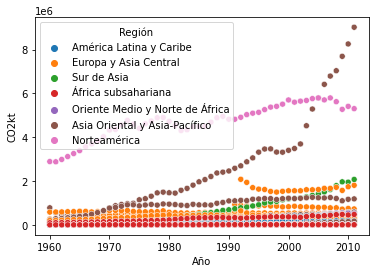

In [36]:
sns.scatterplot(x="Año", y="CO2kt", hue="Región", data=df_emisiones)

<AxesSubplot:xlabel='Año', ylabel='CO2kt'>

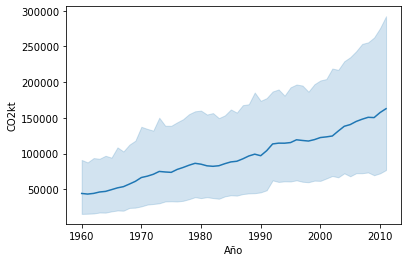

In [37]:
sns.lineplot(x="Año", y="CO2kt", data=df_emisiones)

**Ejercicio 1**

CONSIGNA:

1. Mediante una regresión linear, encontrar el valor esperado de emisiones globales tomando el conjunto de datos completo para 2021:

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression(fit_intercept=True)

In [40]:
X = df_emisiones.Año.values
X = X.reshape(-1,1)

In [41]:
y = df_emisiones.CO2kt.values
y = y.reshape(-1,1)

In [42]:
model.fit(X, y)

LinearRegression()

In [43]:
print(model.coef_)
print(model.intercept_)
print(model.rank_)

[[2197.43054803]]
[-4267376.12944341]
1


In [49]:
df_emisiones.Año.max()

2011

In [47]:
X_pred = np.arange(df_emisiones.Año.max() + 1, df_emisiones.Año.max() + 11).reshape(-1,1)
X_pred

array([[2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021]])

In [55]:
np.arange(df_emisiones.Año.max() + 1, df_emisiones.Año.max() + 11).shape

(10,)

In [56]:
np.arange(df_emisiones.Año.max() + 1, df_emisiones.Año.max() + 11).reshape(-1,1).shape

(10, 1)

In [48]:
y_pred = model.predict(X_pred)
y_pred

array([[153854.13319966],
       [156051.56374769],
       [158248.99429572],
       [160446.42484376],
       [162643.85539179],
       [164841.28593982],
       [167038.71648786],
       [169236.14703589],
       [171433.57758392],
       [173631.00813196]])

In [46]:
print("Las emisiones esperadas para ", X_pred[9,0], " son de ", y_pred[9,0], " kilotones")

Las emisiones esperadas para  2021  son de  173631.0081319576  kilotones


CONSIGNA:

1. Mediante una regresión linear por región, encontrar el valor esperado de emisiones globales por cada una y sumarlas para obtener un global para 2021:

In [50]:
df_emisiones[df_emisiones['Año'] == 2010].CO2kt.sum()

31331684.144999996

In [51]:
df_emisiones[df_emisiones['Año'] == 2011].CO2kt.sum()

32407890.04

In [57]:
regiones = df_emisiones.Región.unique()
regiones

array(['América Latina y Caribe', 'Europa y Asia Central', 'Sur de Asia',
       'África subsahariana', 'Oriente Medio y Norte de África',
       'Asia Oriental y Asia-Pacífico', 'Norteamérica'], dtype=object)

In [68]:
y_pred_regiones = 0
for r in regiones:
    df_emisiones_region = df_emisiones.loc[(df_emisiones['Región'] == r)]
    X = df_emisiones_region.Año.values
    X = X.reshape(-1,1)
    y = df_emisiones_region.CO2kt.values
    y = y.reshape(-1,1)
    model.fit(X, y)
    y_pred = model.predict(X_pred)
    y_pred_regiones+=y_pred[9,0]

In [69]:
print("Las emisiones esperadas para ", X_pred[9,0], " son de ", y_pred_regiones, " kilotones")

Las emisiones esperadas para  2021  son de  3339571.9562484697  kilotones


<AxesSubplot:xlabel='Año', ylabel='CO2kt'>

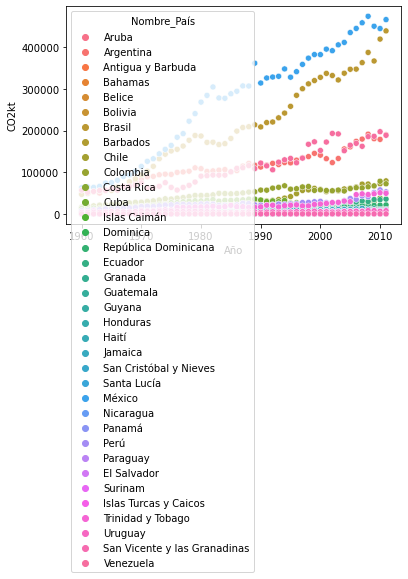

In [70]:
sns.scatterplot(x="Año", y="CO2kt", hue="Nombre_País", data=df_emisiones.loc[(df_emisiones['Región'] == 'América Latina y Caribe')])

CONSIGNA:

1. Mediante una regresión linear por país, encontrar el valor esperado de emisiones globales por cada uno y sumarlas para obtener un global para 2021.

In [59]:
paises = df_emisiones.Nombre_País.unique()

In [60]:
y_pred_paises = 0
for p in paises:
    df_emisiones_pais = df_emisiones.loc[(df_emisiones['Nombre_País'] == p)]
    X = df_emisiones_pais.Año.values
    X = X.reshape(-1,1)
    y = df_emisiones_pais.CO2kt.values
    y = y.reshape(-1,1)
    model.fit(X, y)
    y_pred = model.predict(X_pred)
    y_pred_regiones+=y_pred[9,0]

In [27]:
print("Las emisiones esperadas para ", X_pred[9,0], " son de ", y_pred_regiones, " kilotones")

Las emisiones esperadas para  2021  son de  36116171.91577734  kilotones


**Ejercicio 2**

CONSIGNA:

1. ¿Son iguales los resultados de las regresiones tomadas por país, región y global?
2. Si realizamos nuevamente una regresión linear por país, pero solo evaluando desde 1990, ¿esperamos los mismos valores de emisiones globales?
3. ¿Por qué ocurre esa diferencia?

In [64]:
paises = df_emisiones[df_emisiones['Año'] >= 1990].Nombre_País.unique()
paises

array(['Aruba', 'Andorra', 'Afganistán', 'Angola', 'Albania',
       'Emiratos Árabes Unidos', 'Argentina', 'Armenia',
       'Antigua y Barbuda', 'Australia', 'Austria', 'Azerbaiyán',
       'Burundi', 'Bélgica', 'Benín', 'Burkina Faso', 'Bangladés',
       'Bulgaria', 'Baréin', 'Bahamas', 'Bosnia y Herzegovina',
       'Bielorrusia', 'Belice', 'Bermudas', 'Bolivia', 'Brasil',
       'Barbados', 'Brunéi', 'Bután', 'Botsuana',
       'República Centroafricana', 'Canadá', 'Suiza', 'Chile', 'China',
       'Costa de Marfil', 'Camerún', 'Congo (República)', 'Colombia',
       'Comoras', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Islas Caimán',
       'Chipre', 'República Checa', 'Alemania', 'Yibuti', 'Dominica',
       'Dinamarca', 'República Dominicana', 'Argelia', 'Ecuador',
       'Egipto', 'Eritrea', 'España', 'Estonia', 'Etiopía', 'Finlandia',
       'Fiyi', 'Francia', 'Islas Feroe', 'Micronesia (Estados Federados)',
       'Gabón', 'Reino Unido', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
  

In [66]:
y_pred_paises = 0
for p in paises:
    df_emisiones_pais = df_emisiones.loc[(df_emisiones['Nombre_País'] == p) & (df_emisiones['Año'] >= 1990)]
    X = df_emisiones_pais.Año.values
    X = X.reshape(-1,1)
    y = df_emisiones_pais.CO2kt.values
    y = y.reshape(-1,1)
    model.fit(X, y)
    y_pred = model.predict(X_pred)
    y_pred_paises+=y_pred[9,0]

In [67]:
print("Las emisiones esperadas para ", X_pred[9,0], " son de ", y_pred_paises, " kilotones")

Las emisiones esperadas para  2021  son de  36724148.119428426  kilotones


**Ejercicio 3**

CONSIGNA:

Tomando sólo los datos desde 1990...
1. ¿Cuáles son los 5 países que presentan un MAYOR incremento año a año en sus emisiones?
2. ¿Cuáles son los 5 países que presentan un MENOR incremento año a año en sus emisiones?
3. ¿Cuáles son los 5 países que presentan un MAYOR valor esperado para 2021?
3. ¿Cuáles son los 5 países que presentan un MENOR valor esperado para 2021?

In [71]:
paises = df_emisiones[df_emisiones['Año'] >= 1990].Nombre_País.unique()

In [72]:
df_emisiones_pais_incr = pd.DataFrame([], columns = ["Nombre_País","Región","Coeficiente","Esperado2021"])
for p in paises:
    df_emisiones_pais = df_emisiones.loc[(df_emisiones['Nombre_País'] == p) & (df_emisiones['Año'] >= 1990)]
    X = df_emisiones_pais.Año.values
    X = X.reshape(-1,1)
    y = df_emisiones_pais.CO2kt.values
    y = y.reshape(-1,1)
    model.fit(X, y)
    
    coeficiente = model.coef_[0][0]
    y_pred = model.predict(X_pred)
    esperado2021=y_pred[9,0]
    
    region = df_emisiones_pais.Región.unique()[0]
    to_append = [p, region, coeficiente, esperado2021]
    a_series = pd.Series(to_append, index = df_emisiones_pais_incr.columns)
    df_emisiones_pais_incr = df_emisiones_pais_incr.append(a_series, ignore_index=True)    

In [73]:
df_emisiones_pais_incr.sort_values(by=['Coeficiente'], ascending=False, inplace=True)

In [74]:
df_emisiones_pais_incr.head()

,Nombre_País,Región,Coeficiente,Esperado2021
34,China,Asia Oriental y Asia-Pacífico,291506.446364,1.061107e+07
82,India,Sur de Asia,62192.216527,2.530960e+06
186,Estados Unidos,Norteamérica,34298.134173,6.097811e+06
84,Irán,Oriente Medio y Norte de África,19280.411039,7.809805e+05
81,Indonesia,Asia Oriental y Asia-Pacífico,14710.227391,6.029044e+05


In [75]:
df_emisiones_pais_incr.head()

,Nombre_País,Región,Coeficiente,Esperado2021
34,China,Asia Oriental y Asia-Pacífico,291506.446364,1.061107e+07
82,India,Sur de Asia,62192.216527,2.530960e+06
186,Estados Unidos,Norteamérica,34298.134173,6.097811e+06
84,Irán,Oriente Medio y Norte de África,19280.411039,7.809805e+05
81,Indonesia,Asia Oriental y Asia-Pacífico,14710.227391,6.029044e+05


In [76]:
df_emisiones_pais_incr.tail()

,Nombre_País,Región,Coeficiente,Esperado2021
145,Polonia,Europa y Asia Central,-2793.444359,2.676781e+05
64,Reino Unido,Europa y Asia Central,-3171.505562,4.663338e+05
152,Rusia,Europa y Asia Central,-4721.700940,1.568461e+06
46,Alemania,Europa y Asia Central,-8318.418039,6.612325e+05
184,Ucrania,Europa y Asia Central,-12308.693654,1.247584e+05


In [77]:
df_emisiones_pais_incr.sort_values(by=['Esperado2021'], ascending=True).head()

,Nombre_País,Región,Coeficiente,Esperado2021
113,Moldavia,Europa y Asia Central,-588.809774,-4324.540602
105,Liechtenstein,Europa y Asia Central,-4.767100,3.667000
12,Burundi,África subsahariana,-8.532867,75.265641
96,Kiribati,Asia Oriental y Asia-Pacífico,2.101640,81.587126
163,Santo Tomé y Príncipe,África subsahariana,2.755944,120.002627


In [78]:
df_emisiones_pais_incr.sort_values(by=['Esperado2021'], ascending=True).tail()

,Nombre_País,Región,Coeficiente,Esperado2021
91,Japón,Asia Oriental y Asia-Pacífico,3964.871671,1.266059e+06
152,Rusia,Europa y Asia Central,-4721.700940,1.568461e+06
82,India,Sur de Asia,62192.216527,2.530960e+06
186,Estados Unidos,Norteamérica,34298.134173,6.097811e+06
34,China,Asia Oriental y Asia-Pacífico,291506.446364,1.061107e+07
